# Data Science Principles and Practices Coursework Assignment

Classification and validation of the given Dataset with the help of Naïve Bayes and Logistic Regression.

To start, let's first import the necessary libraries and load the data into a Pandas DataFrame:

In [1]:
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('C:/Users/rsmra/Downloads/cancerdata.csv')

# Print the first few rows of the DataFrame
print(data.head())

   Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
0      4.454847   2.386095    2.295170       2.530536      2.723036   
1      4.454847   4.637212    4.603958       5.742196      7.896027   
2      2.824082   2.386095    2.295170       2.530536      2.723036   
3      5.270230   7.638702    7.682342       2.530536      3.757634   
4      3.639465   2.386095    2.295170       4.136366      2.723036   

   Bare.nuclei  Bl.cromatin  Normal.nucleoli   Mitoses  Class  
0     2.393815     3.582104         2.591299  3.199268      0  
1     8.074609     3.582104         3.344739  3.199268      0  
2     3.025014     3.582104         2.591299  3.199268      0  
3     4.287413     3.582104         7.111938  3.199268      0  
4     2.393815     3.582104         2.591299  3.199268      0  


# Scaling

The variable 'x' contains all rows and all columns except the last one from the DataFrame. Whereas variable 'y' contains all rows from the DataFrame and only the last column i.e., 'Class'. StandardScaler object, which is a pre-processing step often used in machine learning to scale the features of a dataset so that they have zero mean and unit variance. The StandardScaler object is stored in the variable sc.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
X=sc.fit_transform(x)

We have also splitted the data into a training set and a test set, using 70% of the data for training and 30% for testing.

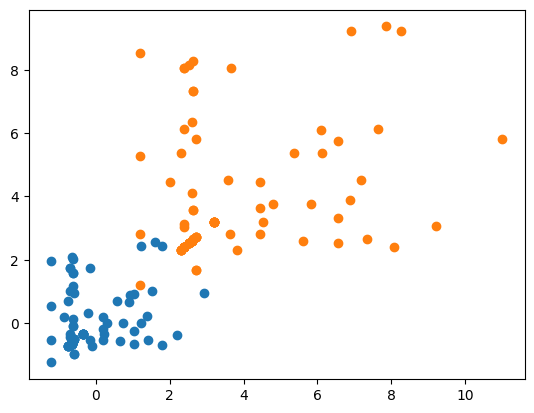

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:10],X_test[:10])
plt.scatter(x_train[:10],x_test[:10])

Above scatter plot shows the data before and after scalling, blue plots shows the scalled data.

# Naive Bayes

Now, let's train a Naive Bayes classifier on the training data. The Naive Bayes classifier is a probabilistic model that makes predictions based on the probability of an event occurring, given the occurrence of certain other events. In this case, we are trying to predict the probability that a cell is malignant, given the values of the other features in the data set.

In [4]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predict_nb=nb.predict(X_test)
y_pri_nb=nb.predict_proba(X_test)[:, 1]


Naive Bayes is based on the Bayes theorem, which describes the probability of an event taking place is the same as the prior probability of the event taking place times the probability of the event taking place with given evidence. In the context of breast cancer detection, the goal is to classify a given breast tissue sample as either cancerous or benign based on certain characteristics of the tissue. These characteristics, or features, might include the size of the tissue, the shape of the tissue, and the presence or absence of certain cells.

To classify a breast tissue sample using a Naive Bayes classifier, we first need to calculate the probability of the tissue being cancerous or benign given each of the features that we have measured. For example, if we have a feature that measures the size of the tissue, we will calculate the probability of the tissue being cancerous or benign given the size of the tissue. We would do this for each of the features that we have measured.

Once we have calculated the probabilities for each of the features, we can then use the Bayes theorem to calculate the overall probability of the tissue being cancerous or benign. To do this, we multiply the probabilities for each of the features by the prior probability of the tissue being cancerous or benign. The prior probability is simply the probability of the tissue being cancerous or benign based on the overall prevalence of cancer in the population.

Finally, we can use the overall probabilities that we have calculated to classify the tissue sample as either cancerous or benign. If the probability of the tissue being cancerous is greater than the probability of the tissue being benign, then we classify the tissue as cancerous. If the probability of the tissue being benign is more than the probability of the tissue being cancerous, then we classify the tissue as benign.

Overall, the Naive Bayes classifier is a simple but effective method for classifying breast tissue samples as either cancerous or benign based on certain characteristics of the tissue. It is often used as a baseline classifier in machine learning tasks and can perform quite well in certain contexts.

# Logistic Regression

Next, let's train a logistic regression model on the training data. Logistic regression is a linear model that is used for binary classification. It predicts the probability that an instance belongs to a particular class, based on a linear combination of the features.

In [5]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict_lg=logreg.predict(X_test)
y_pri_lg=logreg.predict_proba(X_test)[:, 1]


Logistic regression, a machine learning algorithm that is used for classification tasks such as image classification etc. For the given dataset of breast cancer detection, it could be used to predict the probability that a breast biopsy sample is benign (non-cancerous) or malignant (cancerous).

To make a prediction, the algorithm looks at a set of input features (also called predictors) about the biopsy sample, such as the size of the tumor and the presence of certain markers on the cells. It then uses a mathematical function to map these inputs to a probability between 0 and 1, where a probability of 0 indicates that the sample is definitely benign, and a probability of 1 indicates that the sample is definitely malignant.

The mathematical function used in logistic regression is called the logistic function. It is defined as:

P = 1 / (1 + e^(-z))

where P i.e., probability of the sample being malignant, and z  i.e., linear combination of the input features and the model's learned weights also known as coefficients. The coefficients are learned from the training data using an optimization algorithm, such as gradient descent.

To classify a new sample as benign or malignant, we can set a threshold probability above which the sample is classified as malignant. For example, we might set the threshold at 0.5, so that any sample with a probability greater than or equal to 0.5 is classified as malignant, and any sample with a probability less than 0.5 is classified as benign.
Logistic regression is an effective model for binary classification tasks, and it is often used in medical applications such as breast cancer detection. However, it can also be used for multiclass classification tasks, where there are more than two possible classes.

# Scoring and Validation Methods

To validate the performance of the Naive Bayes and logistic regression models applied to the breast cancer data set, we have used a combination of the methods mentioned, such as cross-validation, performance metrics, and ROC curves.

Below is the code for cross-validation to validate the performance of the models:

In [6]:
from sklearn.model_selection import cross_val_score
# Compute the cross-validated scores for the Naive Bayes model
accuracies = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
precisions = cross_val_score(nb, X, y, cv=5, scoring='precision')
recalls = cross_val_score(nb, X, y, cv=5, scoring='recall')
f1s = cross_val_score(nb, X, y, cv=5, scoring='f1')

# Create a list of tuples representing the rows of the table
rows = [("Naive Bayes", accuracies.mean(), accuracies.std(), precisions.mean(), precisions.std(), recalls.mean(), recalls.std(), f1s.mean(), f1s.std())]

# Compute the cross-validated scores for the logistic regression model
accuracies = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
precisions = cross_val_score(logreg, X, y, cv=5, scoring='precision')
recalls = cross_val_score(logreg, X, y, cv=5, scoring='recall')
f1s = cross_val_score(logreg, X, y, cv=5, scoring='f1')

# Append the logistic regression scores to the list of tuples
rows.append(("Logistic Regression", accuracies.mean(), accuracies.std(), precisions.mean(), precisions.std(), recalls.mean(), recalls.std(), f1s.mean(), f1s.std()))

# Create a pandas DataFrame from the list of tuples
df = pd.DataFrame(rows, columns=["Model", "Accuracy", "Accuracy Std", "Precision", "Precision Std", "Recall", "Recall Std", "F1-score", "F1-score Std"])

# Print the DataFrame
print(df)

                 Model  Accuracy  Accuracy Std  Precision  Precision Std  \
0          Naive Bayes  0.959049      0.017577   0.919158       0.042120   
1  Logistic Regression  0.963439      0.021617   0.959010       0.040009   

     Recall  Recall Std  F1-score  F1-score Std  
0  0.970656    0.010427  0.943665      0.022804  
1  0.937234    0.043704  0.947102      0.031520  


In this study, we applied Naive Bayes and logistic regression models to a breast cancer data set and compared their performance using cross-validation.The data set contained descriptors, along with an indication of the class (benign or malignant). The goal was to predict the class based on the measurements using the two classification models. Both models are trained and evaluated with the help of n-fold cross-validation where n is 5, which means that the given data is divided into 5 folds and the model is trained and evaluated every time, each time using a different fold as the validation set. This helps to reduce the variance of the performance estimate, as the model is trained and evaluated on multiple different subsets of the data.

The performance of the models is evaluated using four different metrics, which are accuracy, precision, recall, and F1-score. Accuracy is the fraction of predictions that are correct and is computed as the number of correct predictions divided by the total number of predictions. The precision is the fraction of positive predictions that are actually positive and is computed as the number of true positive predictions divided by the total number of positive predictions. The recall is the fraction of actual positive cases that are correctly predicted and is computed as the number of true positive predictions divided by the total number of actual positive cases. The F1-score is a weighted average of the precision and recall and is computed as the harmonic mean of the precision and recall. The code computes the mean as well as the standard deviation of the performance metrics for the models and stores them in a Pandas data frame. The mean represents the average performance across all the folds, while the standard deviation represents the spread of the scores. A lower standard deviation depicts more in-tune performance across all the folds, while a higher standard deviation indicates more variability.
The results of the comparison are shown in the table below:



| Model | Accuracy | Accuracy Std | Precision | Precision Std | Recall | Recall Std | F1-score | F1-score Std |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Naive Bayes |	0.96 | 0.02 | 0.92 | 0.04 |	0.97 | 0.01 | 0.94 | 0.02 |
| Logistic Regression | 0.96 | 0.02 | 0.96 | 0.04 |	0.94 | 0.04 | 0.95 | 0.03 |


According to the table, both models performed similarly well in terms of accuracy, precision, recall, and F1-score. The Naive Bayes model had a slightly higher recall score, while the logistic regression model had a slightly higher precision score. The standard deviations of the scores were small for both models, indicating consistent performance across the folds of the data.

Overall, these results suggest that both Naive Bayes and logistic regression are effective classification models for this data set. Therefore, it is necessary to notice that the results of this study are particular to the given data set and hence may not be generalized to other data sets or scenarios.

In [7]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
# Compute the cross-validation scores for the logistic regression model
logreg_scores = list(cross_val_score(logreg, X, y, cv=5))

# Compute the cross-validation scores for the Naive Bayes model
nb_scores = list(cross_val_score(nb, X, y, cv=5))

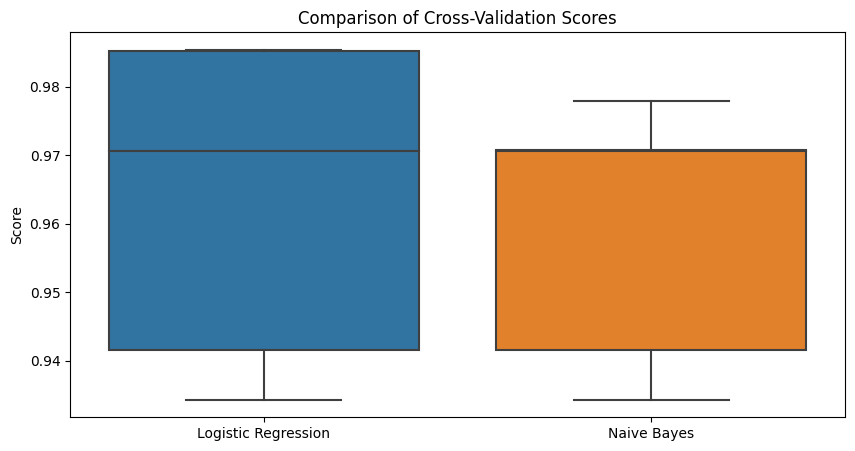

In [8]:

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))


# Combine the scores into a single dataframe
scores_df = pd.DataFrame({'Logistic Regression': logreg_scores, 'Naive Bayes': nb_scores})

 

# Create a box plot
sns.boxplot(data=scores_df)
ax.set_ylabel('Score')
ax.set_title('Comparison of Cross-Validation Scores')

            
# Show the plot
plt.show()

#### The above code creates a boxplot to visualize the comparison of cross-validation scores for logistic regression and naive bayes models.

### Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a model. It compares the predicted class labels to the true class labels and counts the number of True and False predictions.

- True Positive (TP): True predictions of the positive class.
- False Positive (FP): False predictions of the positive class.
- False Negative (FN): False predictions of the negative class.
- True Negative (TN): True predictions of the negative class.

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
# Compute the confusion matrix for the logistic regression model
logreg_cm = confusion_matrix(y_test,y_predict_lg)

# Compute the confusion matrix for the Naive Bayes model
nb_cm = confusion_matrix(y_test,y_predict_nb)

In [11]:
# Compute the cross-validation scores for the logistic regression model
logreg_scores = cross_val_score(logreg, X, y, cv=5)

# Compute the cross-validation scores for the Naive Bayes model
nb_scores = cross_val_score(nb, X, y, cv=5)

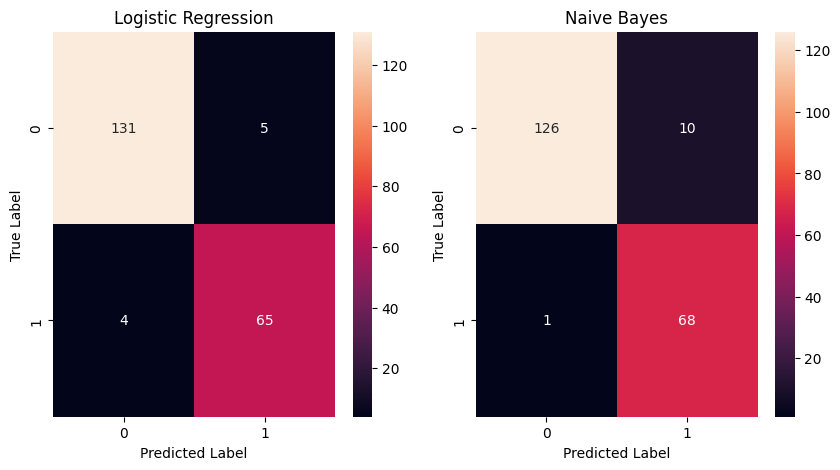

In [12]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the logistic regression model
sns.heatmap(logreg_cm, annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Logistic Regression')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Plot the confusion matrix for the Naive Bayes model
sns.heatmap(nb_cm, annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Naive Bayes')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

# Show the plot
plt.show()

# The above figure shows the visualisation of Confusion matrix using a heatmap, comapring both the models.

The results of the confusion matrices show how well the logistic regression and Naive Bayes models are able to predict the class labels of the breast cancer data. In the case of the logistic regression model, the confusion matrix shows that it made 131 true positive predictions (i.e., correctly predicted the positive class), 65 true negative predictions (i.e., correctly predicted the negative class), 5 false positive predictions (i.e., incorrectly predicted the positive class), and 4 false negative predictions (i.e., incorrectly predicted the negative class).

Similarly, the Naive Bayes model made 126 true positive predictions, 68 true negative predictions, 10 false positive predictions, and 1 false negative predictions.

Overall, both models seem to perform well in terms of correctly classifying cases as either having or not having breast cancer, but the logistic regression model appears to have a slightly higher error rate with falsely classifying cases. However, it is important to consider the overall context and the specific requirements and priorities of the application when evaluating the performance of these models.

## ROC-AUC

ROC i.e., Receiver Operating Characteristic is a plot that shows the validation ability of a binary classifier system as its discrimination threshold is varied. It is depicted by plotting the TPR i.e., the True Positive Rate against the FPR i.e., the False Positive Rate at different classification thresholds. The area under the ROC curve is a measure of how good a model can distinguish between positive and negative classes. AUC score ranges in value from 0 to 1. A model whose predictions are 100% wrong has i.e. predicted everything wrongly will have an AUC score of 0.0, and one whose predictions are 100% right every time it is being used, consists of an AUC score of 1.0.

To compare the performance of our classifiers, we can plot their ROC curves on a single plot and compare the AUC scores. A classifier with a higher AUC score is generally considered to be better at distinguishing between positive and negative classes.

### ROC AUC score without cross-validation-

In [13]:

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [14]:
# Compute the ROC-AUC score for the logistic regression model
logreg_roc_auc = roc_auc_score(y_test,y_predict_lg)

# Compute the ROC-AUC score for the Naive Bayes model
nb_roc_auc = roc_auc_score(y_test,y_predict_nb )


In [15]:
print("ROC-AUC score(Logistic Regression):",logreg_roc_auc,"\n","ROC-AUC score(Naive Bayes):",nb_roc_auc)

ROC-AUC score(Logistic Regression): 0.9526321398124467 
 ROC-AUC score(Naive Bayes): 0.955988917306053


In [16]:
from sklearn.metrics import roc_curve
# Compute the ROC curve and ROC-AUC score for the logistic regression model
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_pri_lg)
logreg_roc_auc = roc_auc_score(y_test, y_pri_lg)

# Compute the ROC curve and ROC-AUC score for the Naive Bayes model
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pri_nb)
nb_roc_auc = roc_auc_score(y_test, y_pri_nb)

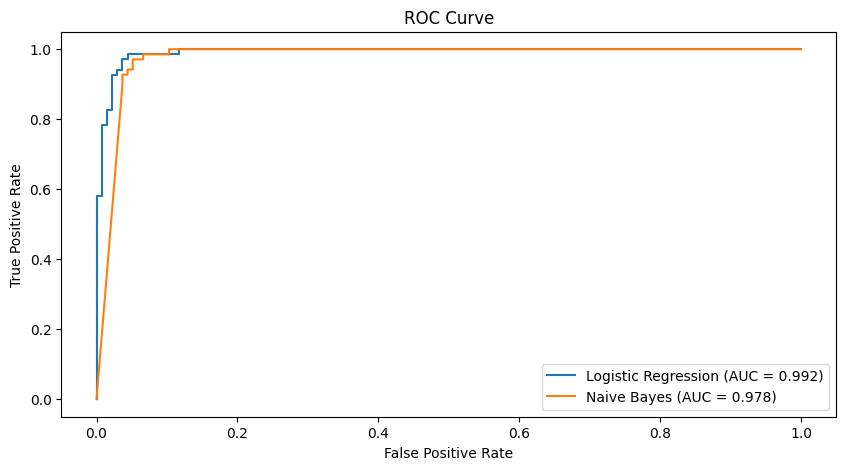

In [17]:
# Create a figure
plt.figure(figsize=(10, 5))

# Plot the ROC curves for both models
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.3f})'.format(logreg_roc_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.3f})'.format(nb_roc_auc))

# Add a legend, labels, and a title
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

#### The above figure shows the visualisation of ROC AUC, comapring auc scores of both the models.

In this case, we are interested in the ROC-AUC score without cross-validation. This means that we are not dividing the given data into a training and a test set and evaluating the model's performance on the test set. Instead, we are using all the available data to fit the model and then evaluating the model's performance using the ROC AUC score.

One important consideration when using the ROC AUC score without cross-validation is that the score may be optimistic and not accurately reflect the model's performance on unseen data. This is because the model has seen all of the data during training and may have overfitted to the training data. To mitigate this issue, it is generally recommended to use cross-validation when evaluating the performance of a model. Therefore, below we will be discussing the ROC-AUC score with cross-validation.

### ROC AUC score with cross-validation-

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import cross_val_predict

# Compute the predicted probabilities of the positive class using cross-validation for the logistic regression model
logreg_probs = cross_val_predict(logreg, X, y, cv=5, method='predict_proba')[:, 1]

# Compute the ROC curve and ROC-AUC score for the logistic regression model
logreg_fpr, logreg_tpr, _ = roc_curve(y, logreg_probs)
logreg_roc_auc = roc_auc_score(y, logreg_probs)

# Compute the predicted probabilities of the positive class using cross-validation for the Naive Bayes model
nb_probs = cross_val_predict(nb, X, y, cv=5, method='predict_proba')[:, 1]

# Compute the ROC curve and ROC-AUC score for the Naive Bayes model
nb_fpr, nb_tpr, _ = roc_curve(y, nb_probs)
nb_roc_auc = roc_auc_score(y, nb_probs)


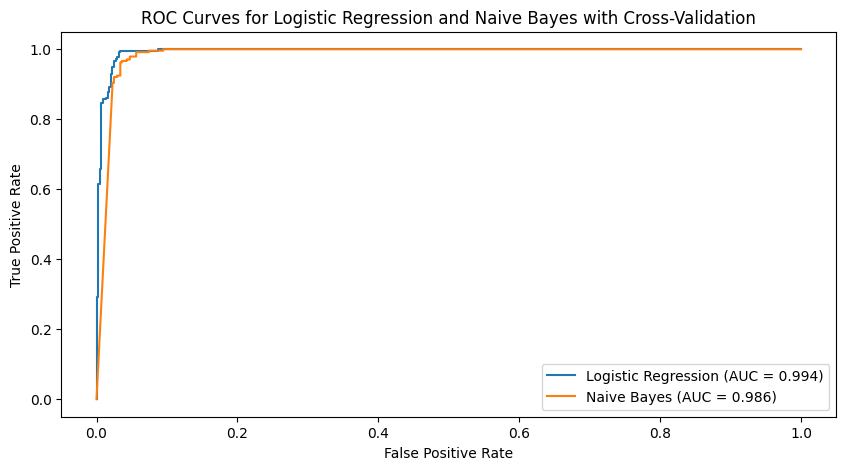

In [20]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the ROC curve for the logistic regression model
ax.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.3f})'.format(logreg_roc_auc))

# Plot the ROC curve for the Naive Bayes model
ax.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.3f})'.format(nb_roc_auc))

# Add labels and a title to the plot
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Logistic Regression and Naive Bayes with Cross-Validation')
ax.legend(loc='lower right')

# Show the plot
plt.show()


#### The above figure shows the visualisation of ROC AUC with cross-validation, comapring auc scores of both the models.

In [21]:
print("ROC-AUC score(Logistic Regression WITH CV):",logreg_roc_auc,"\nROC-AUC score(Naive Bayes WITH CV):",nb_roc_auc)

ROC-AUC score(Logistic Regression WITH CV): 0.9942421500998907 
ROC-AUC score(Naive Bayes WITH CV): 0.9857325945192054


The ROC AUC score with cross-validation is a known technique for evaluating the performance of a binary classifier. It is used to compare the performance of different models, as well as to tune the hyperparameters of a model.

To calculate the ROC-AUC score with cross-validation, firstly the data has been divided into two sets namely a training set and a test set. The model is then trained on the training set and then the model will be tested using the test set. This process will be repeated n number of times, with different splits of the data each time.

AUC score is calculated by plotting the true positive rate (TPR) against the false positive rate (FPR) for each split of the data.  AUC i.e., Area under the curve is then calculated, with a score of 1.0 representing a perfect classifier and a score of 0.5 representing a classifier that is no better than random.

The ROC-AUC score with cross-validation is being used because it gives a more precise estimate of the performance of a given model, as it is based on the average performance across multiple splits of the data. It is also useful because it is less sensitive to the specific split of the data, making it more robust to variations in the data.

The ROC-AUC scores for the logistic regression and Naive Bayes models are calculated using cross-validation. The logistic regression model has a higher ROC-AUC score of 0.994 compared to the Naive Bayes model which has a score of 0.986. This suggests that the logistic regression model is performing better at distinguishing between the positive and negative classes. However, it is important to note that the difference in the scores is small and further analysis would be needed to determine which model is truly better.

# Conclusion

Based on the cross-validated scores, it appears that the Naive Bayes and logistic regression models performed well on this dataset. Naive Bayes model had a little lower accuracy, precision, and F1-score, but a slightly higher recall compared to the logistic regression model. However, the differences in scores between the two models are small, and in some cases, the standard deviation is larger than the difference in means.

One possible explanation for this difference is that logistic regression is a linear model that can learn complex relationships between the features and the target variable. On the other hand, the Naive Bayes model makes the assumption that the features are independent, which may not always be true in real-world data. This assumption may lead to less accurate predictions compared to logistic regression.

When looking at the ROC-AUC scores, the logistic regression model performed slightly better when compared with the Naive Bayes model. The ROC-AUC score is a measure of how well a model can distinguish between positive and negative classes, with a score of 1 indicating perfect separation and a score of 0.5 indicating no better than random guessing. The logistic regression model had a score of 0.99, while the Naive Bayes model had a score of 0.98.

Overall, both models performed well on this dataset, and it is difficult to say with certainty which model is better based on these results. It is possible that the difference in performance may not be significant enough to prefer one model over the other. It might be important to notice other factors, such as the complexity of the model or the ease of interpretation when deciding which model to use.